# Census Income Prediction Project

In [120]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [121]:
#Loading the dataset
df=pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [122]:
df.shape

(32560, 15)

This dataset contains 32560 rows and 15 columns.

In [123]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [124]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [125]:
df.sample(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
5112,59,Federal-gov,243612,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
11599,47,Private,33710,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,3103,0,60,United-States,>50K
26285,50,Private,338033,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,32,United-States,<=50K
22260,45,Private,353012,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
12465,48,Private,172709,HS-grad,9,Divorced,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
18470,43,Private,88233,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K
27335,26,Self-emp-not-inc,118523,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
9117,23,Private,218782,10th,6,Never-married,Handlers-cleaners,Other-relative,Other,Male,0,0,40,United-States,<=50K
19630,34,Private,150324,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
27184,28,Self-emp-not-inc,294398,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,0,40,United-States,<=50K


In [126]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [127]:
#To see columns in a list
df.columns.to_list()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [128]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

As, we can see that

    1) "Age", "Fnlwgt", "Education_num", "Capital_gain" and "Capital_loss" are continous in nature.
    2) "Workclass", "Education", "Marital_status", "Occupation", "Relationship", "Race", "Sex" are categorical in nature.

In [129]:
for i in df.columns:
    if(df[i].dtype==object):
        print(i,"\n")
        print(df[i].value_counts(),"\n")

Workclass 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

Education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64 

Marital_status 

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64 

Occupation 

 Prof-spec

# Checking Null values

In [130]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that No null values present.

In [132]:
#Checking for " ", NA, - values present in this dataset.
df.isin([' ','NA','-']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [133]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Here we can see that '?' values present.

In [134]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [135]:
df.loc[df['Workclass'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [136]:
df.loc[df['Occupation'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [137]:
df.loc[df['Native_country'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [138]:
#Let check if any whitespace, 'NA' or '-' exists in our dataset
df.isin([' ', 'NA', '-', ' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [139]:
# Replacing those values with NAN
df = df.replace([' ', 'NA', '-', ' ?'], np.NaN)

In [140]:
df.isin([' ', 'NA', '-', ' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [141]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<Axes: >

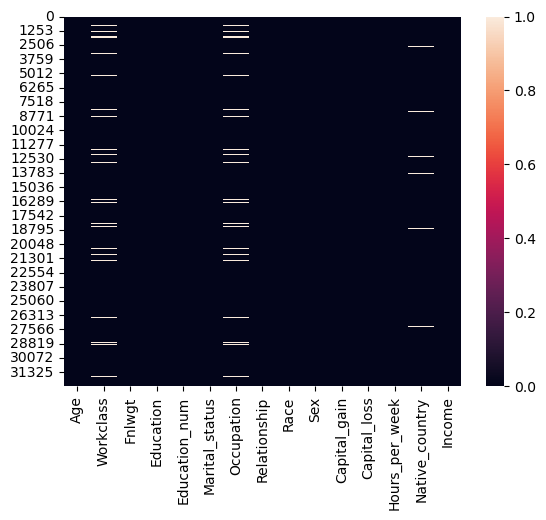

In [142]:
#To see in a heatmap
sns.heatmap(df.isnull())

Now, we can see that 3 columns have null values, since all 3 are categorical column, we will replace it with mode.

In [143]:
#Replacing null values with mode
df['Workclass'] = df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country'] = df['Native_country'].fillna(df['Native_country'].mode()[0])

In [144]:
#Checking now
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

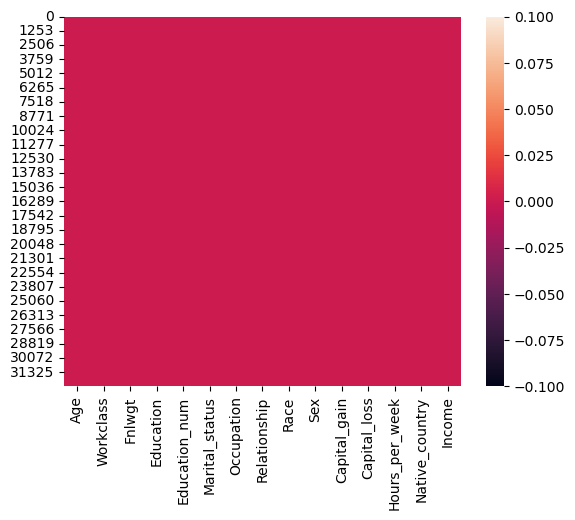

In [145]:
#To see in a heatmap
sns.heatmap(df.isnull())

Now, we can see that no null values present.

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [147]:
# Separating Numerical & Categorical columns
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(include=['int64']).columns

print('Categorical columns are: ',cat_columns)
print('\n')
print('Numerical columns are: ',num_columns)

Categorical columns are:  Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


Numerical columns are:  Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')


# Checking Duplicates values.

In [148]:
df.duplicated().sum()

24

In [149]:
df[df.duplicated()]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


Here, we can see that 24 duplicates found.

In [150]:
#To remove duplicates.
df.drop_duplicates(keep='last', inplace=True)

In [151]:
df.shape

(32536, 15)

In [152]:
df.duplicated().sum()

0

In [153]:
df[df.duplicated()]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


Now, we can see that all duplicate datas have been removed.

In [154]:
#statisdical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


From the above, we can see that,
 
    1.The dataset looks perfect because it did not have any negative/invalid datas
    2.The counts are same, so missing/null values
    3.In columns 'Capital_gain' and 'Capital_loss' mean is greater than median(50%), so Right side skewness.
    4.There is also huge difference between 75% and max in columns'Capital_gain', 'Hours_per_week', 'Fnlwgt' and 'Capital_loss',so outliers are present.

# Data Visualization.

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


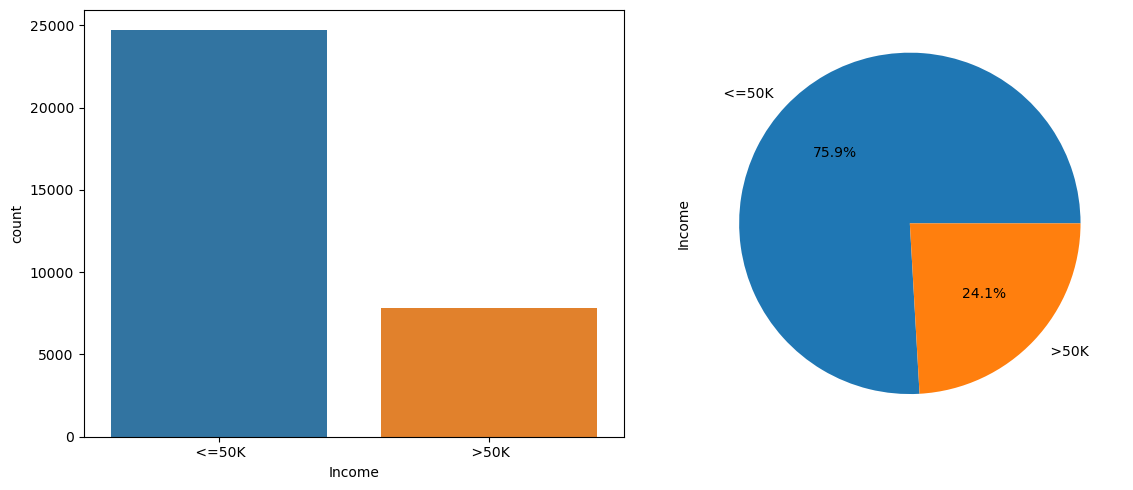

In [155]:
print(df['Income'].value_counts())
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='Income', data=df, ax=axes[0])
df['Income'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.tight_layout()
plt.show()

Most people are in the income category of <=50K, nearly 76%. Only 24% people are having income above 50K.

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


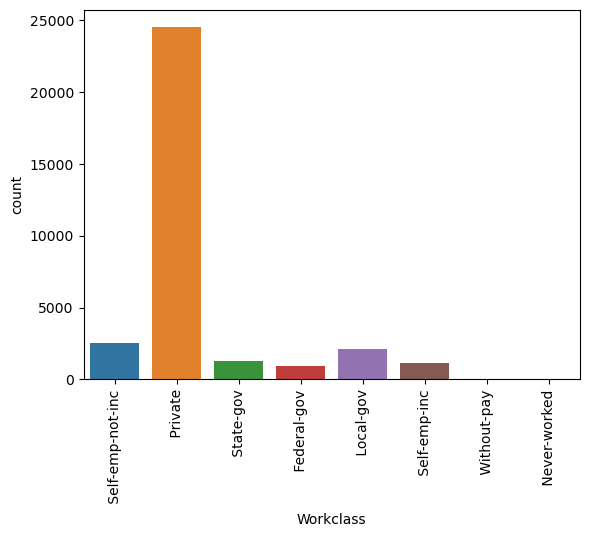

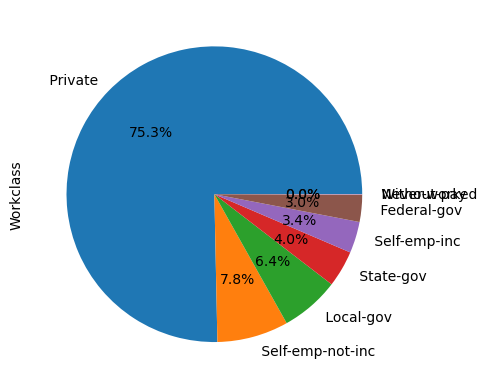

In [156]:
print(df['Workclass'].value_counts())
sns.countplot(x='Workclass', data =df)
plt.xticks(rotation=90)
plt.show()
df['Workclass'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.show()

75% people are working in the private sector.

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


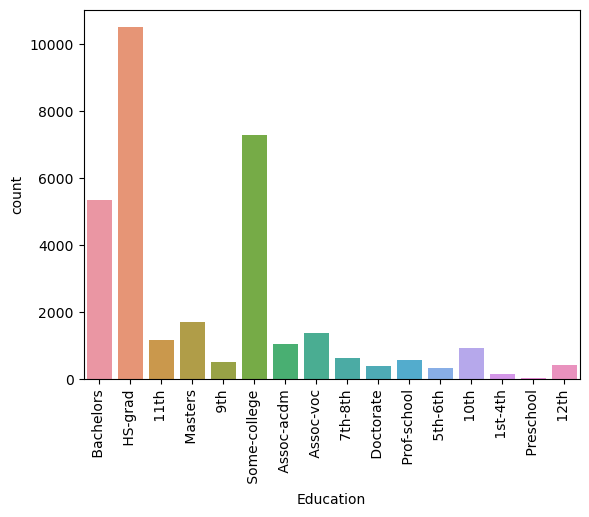

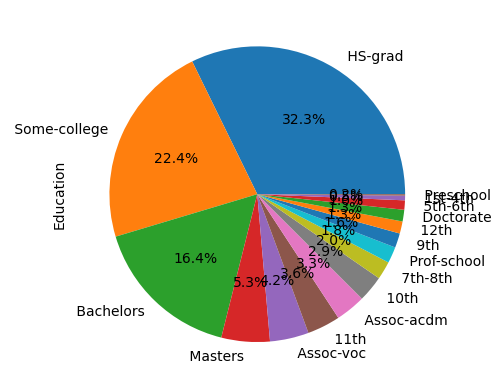

In [157]:
print(df['Education'].value_counts())
sns.countplot(x='Education', data =df)
plt.xticks(rotation=90)
plt.show()
df['Education'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.show()

Most people have the education up to High School graduation(32%), 23% of people have college education, 16.4% have Bachelors degree and only 5% people have master degree.

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64


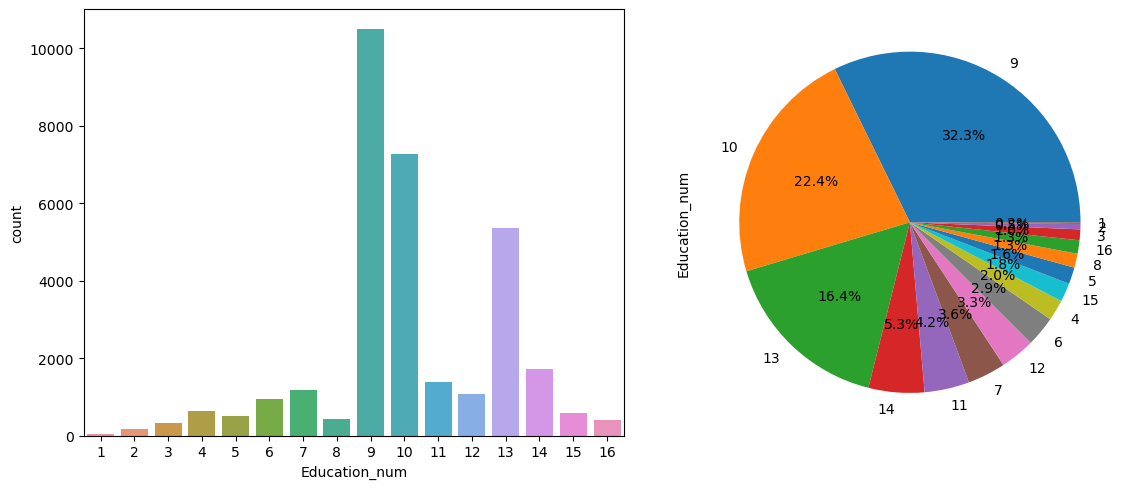

In [158]:
print(df['Education_num'].value_counts())
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='Education_num', data=df, ax=axes[0])
df['Education_num'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.tight_layout()
plt.show()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


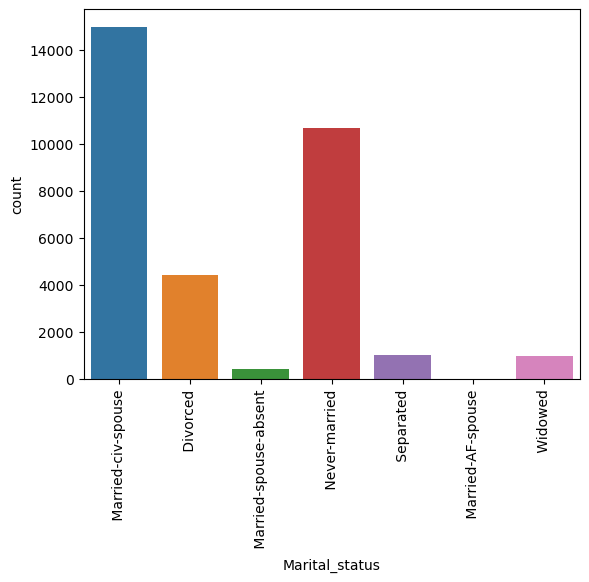

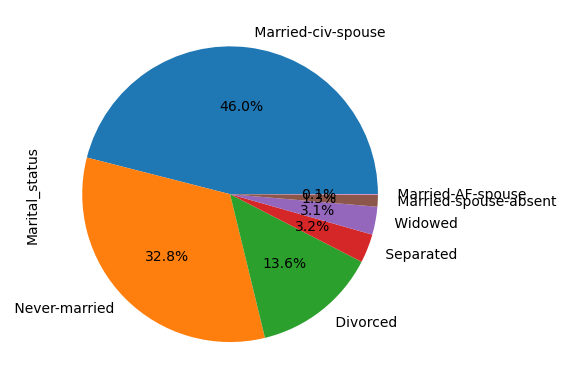

In [159]:
print(df['Marital_status'].value_counts())
sns.countplot(x='Marital_status', data =df)
plt.xticks(rotation=90)
plt.show()
df['Marital_status'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.show()

Nearly 46% people married and living with his/her spouse, 32% of people has never been married and 13% people got divorced.

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


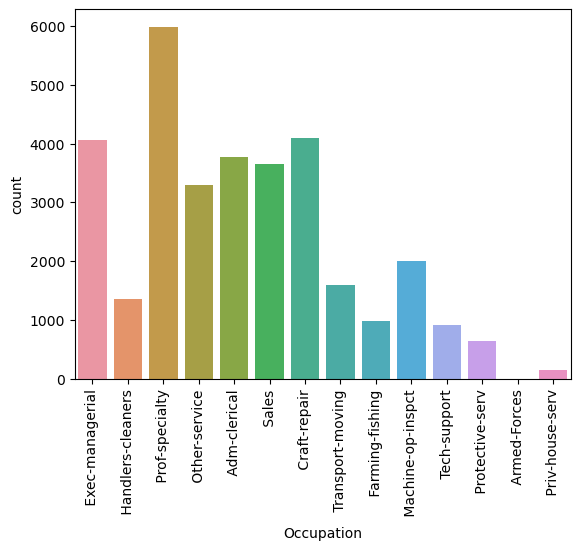

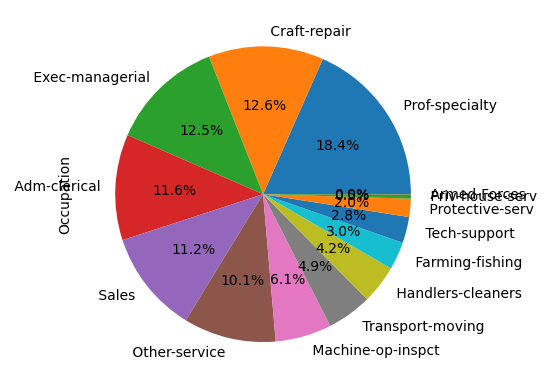

In [160]:
print(df['Occupation'].value_counts())
sns.countplot(x='Occupation', data =df)
plt.xticks(rotation=90)
plt.show()
df['Occupation'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.show()

People have various kinds of occupation. most commonly are Prof-specialty ,Craft-repair, Exec-managerial ,Adm-clerical and Sales.

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


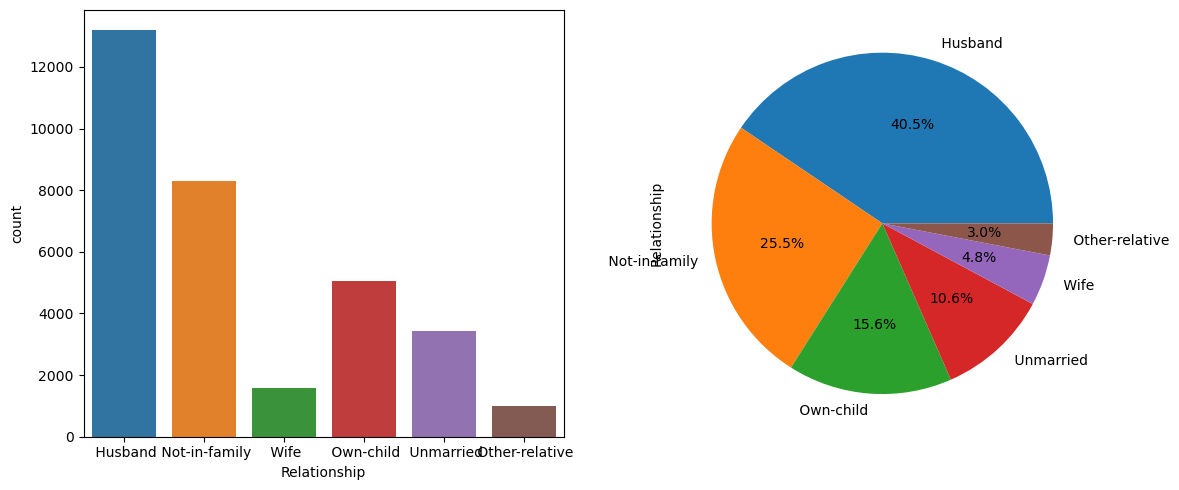

In [161]:
print(df['Relationship'].value_counts())
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='Relationship', data=df, ax=axes[0])
df['Relationship'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.tight_layout()
plt.show()

Nerly 25% of people are not in the family relationship.

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


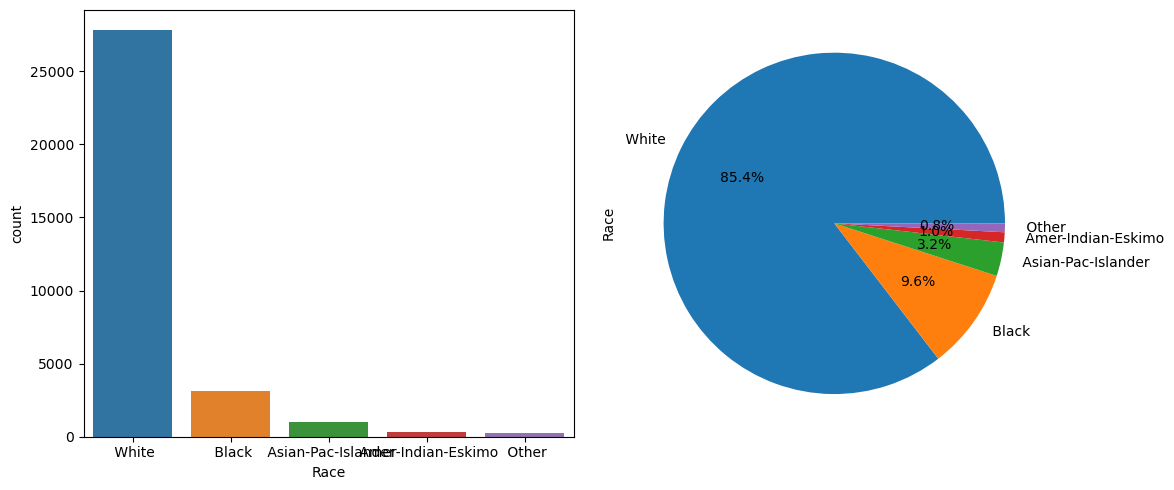

In [162]:
print(df['Race'].value_counts())
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='Race', data=df, ax=axes[0])
df['Race'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.tight_layout()
plt.show()

Most prevalent Race is white(85%) and next is black(10%) and others are very less.

 Male      21774
 Female    10762
Name: Sex, dtype: int64


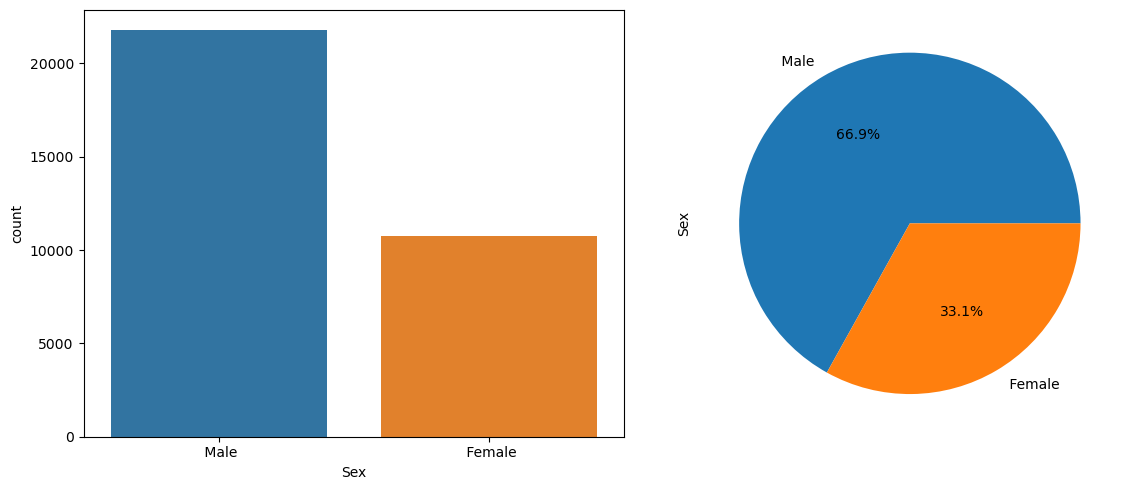

In [163]:
print(df['Sex'].value_counts())
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='Sex', data=df, ax=axes[0])
df['Sex'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.tight_layout()
plt.show()

Most of the people are males nearly 67% and females are only 33%.

40    15203
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


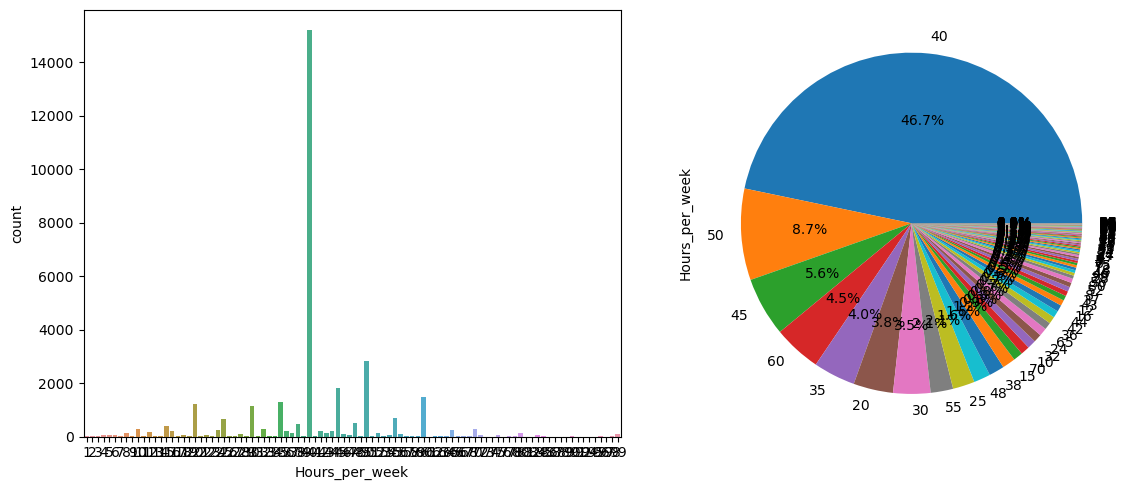

In [164]:
print(df['Hours_per_week'].value_counts())
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='Hours_per_week', data=df, ax=axes[0])
df['Hours_per_week'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.tight_layout()
plt.show()

Nearly half of the population are doing work for 40 hours per week.

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

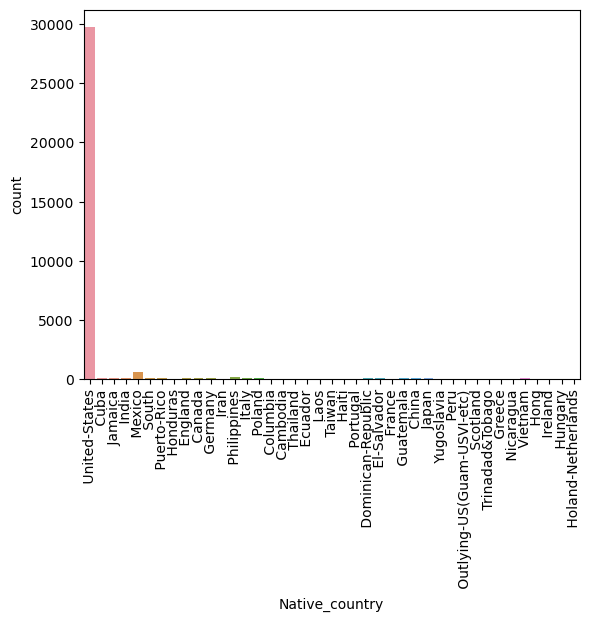

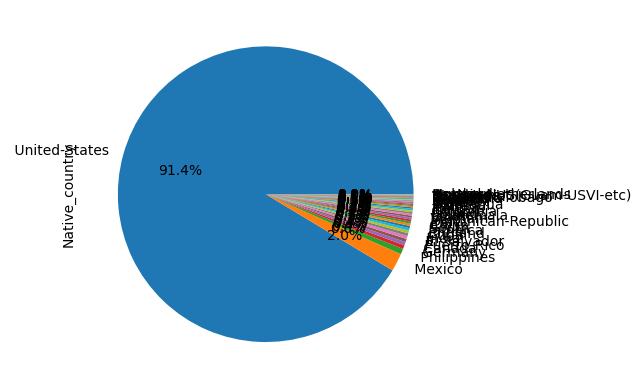

In [165]:
print(df['Native_country'].value_counts())
sns.countplot(x='Native_country', data =df)
plt.xticks(rotation=90)
plt.show()
df['Native_country'].value_counts().plot(kind="pie", autopct="%0.1f%%")
plt.show()

Native Country of 91%  of people is US. 

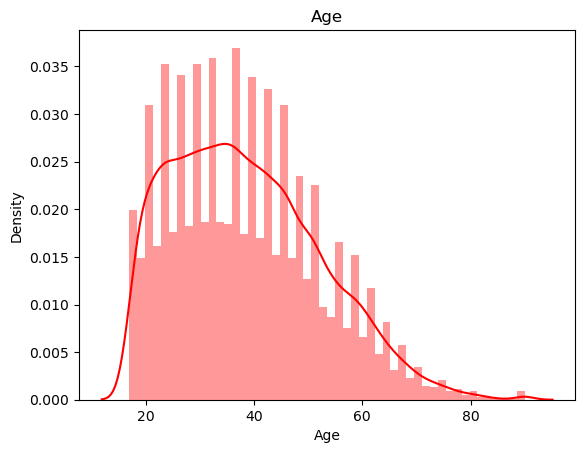

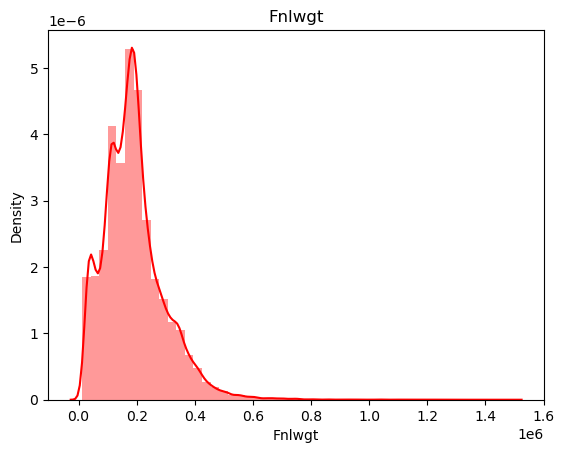

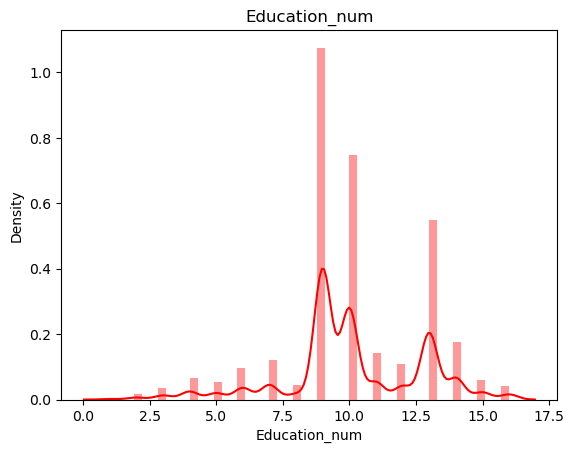

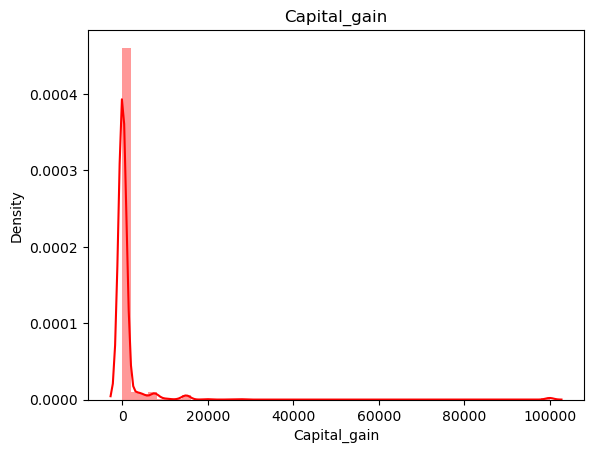

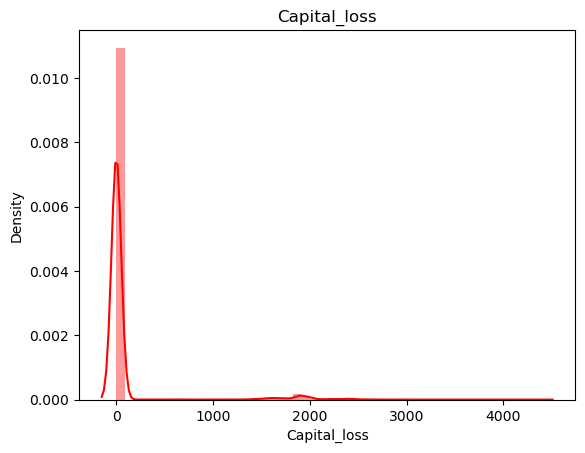

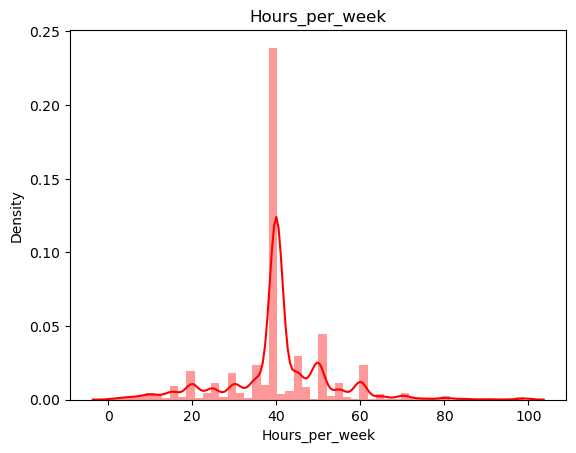

In [166]:
for i in df.columns :
    if df[i].dtypes!=object:
        sns.distplot(df[i] , kde = True , color = 'red' )
        plt.title(i)
        plt.show()

In [233]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

From the above graphs, we can see that columns 'Fnlwgt', 'Capital_gain' and 'Capital_loss' have right side skewness.

Bivariant Analysis

<Axes: xlabel='Income', ylabel='count'>

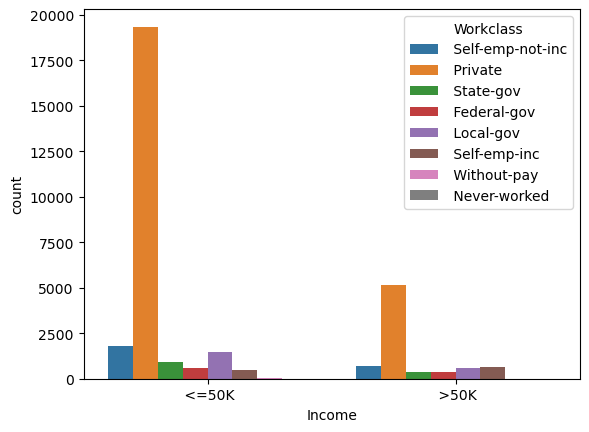

In [167]:
sns.countplot(x='Income',hue='Workclass',data=df)

Nearly 75% of people who are working in private sector are earning <=50K. Comparing to others, more private sector people are earning >50K.

<Axes: xlabel='Income', ylabel='count'>

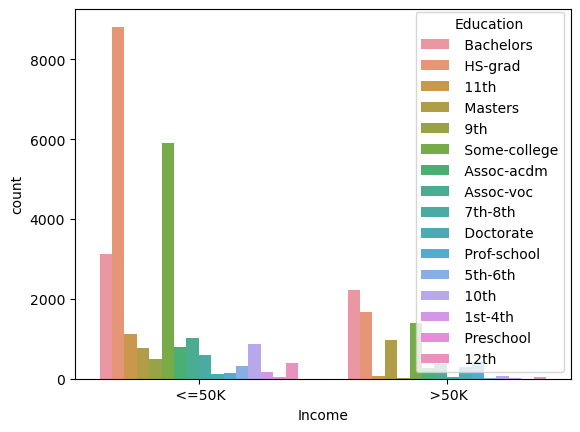

In [168]:
sns.countplot(x='Income',hue='Education',data=df)

People who are having Bachelors degree are earning >50K.

<Axes: xlabel='Income', ylabel='count'>

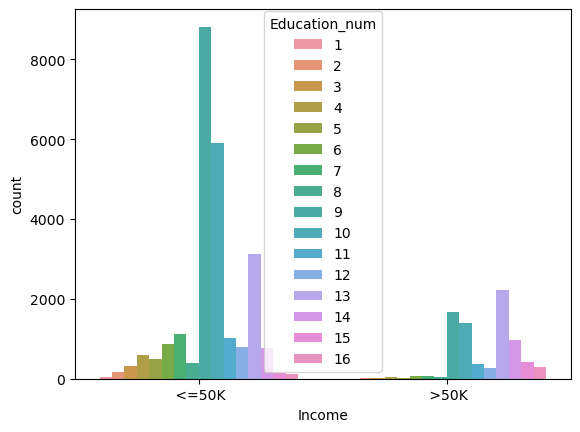

In [169]:
sns.countplot(x='Income',hue='Education_num',data=df)

<Axes: xlabel='Income', ylabel='count'>

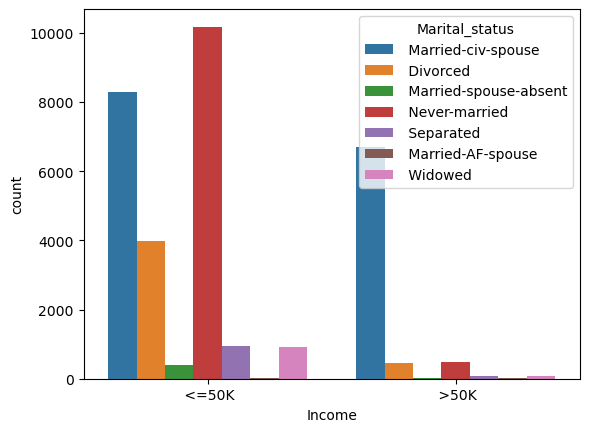

In [170]:
sns.countplot(x='Income',hue='Marital_status',data=df)

Most of the people who are married and living with spouse are earning >50K.

<Axes: xlabel='Income', ylabel='count'>

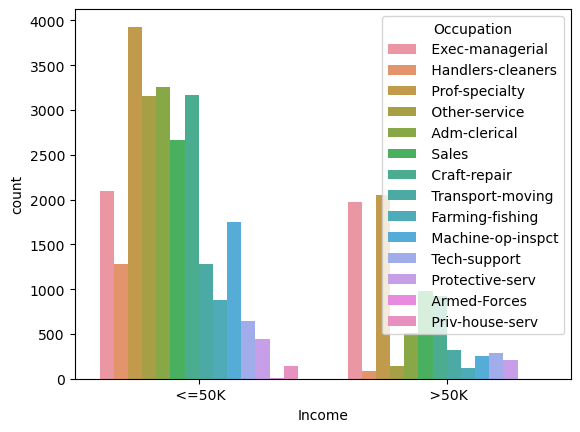

In [171]:
sns.countplot(x='Income',hue='Occupation',data=df)

People from Exec-managerial and prof-speciality occupation are earning >50K.

<Axes: xlabel='Income', ylabel='count'>

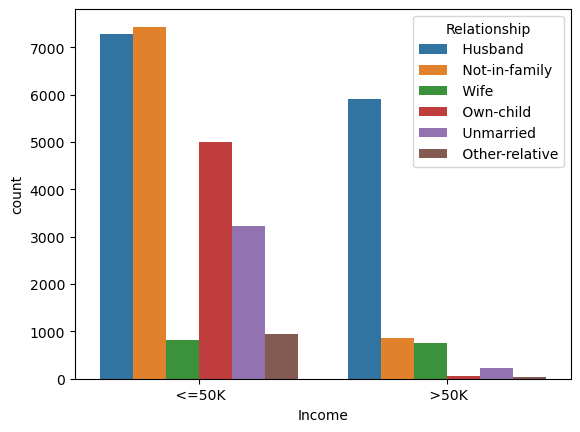

In [172]:
sns.countplot(x='Income',hue='Relationship',data=df)

<Axes: xlabel='Income', ylabel='count'>

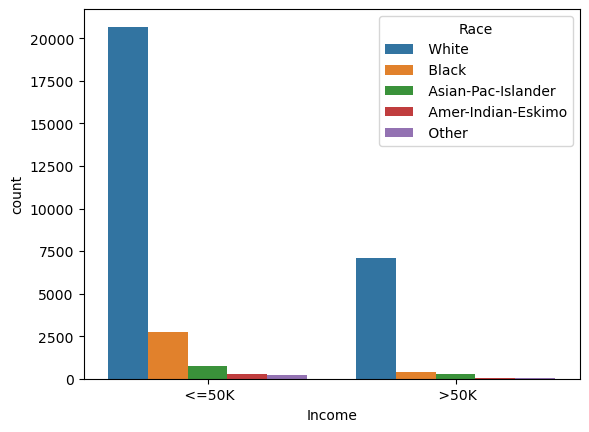

In [173]:
sns.countplot(x='Income',hue='Race',data=df)

Nearly 30% of people from White race are earning >50K.

<Axes: xlabel='Income', ylabel='count'>

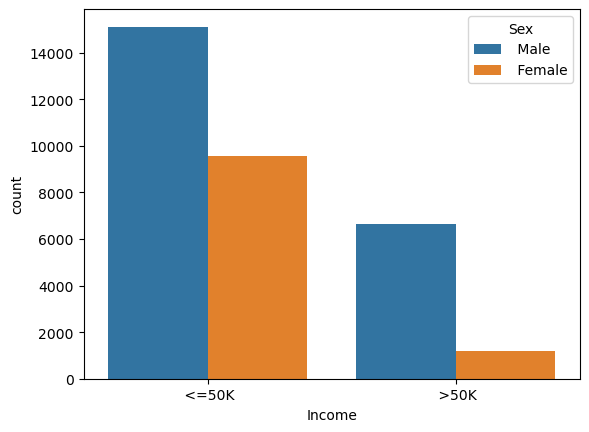

In [174]:
sns.countplot(x='Income',hue='Sex',data=df)

Males earning >50K are significantly more when compared to females.

<Axes: xlabel='Income', ylabel='count'>

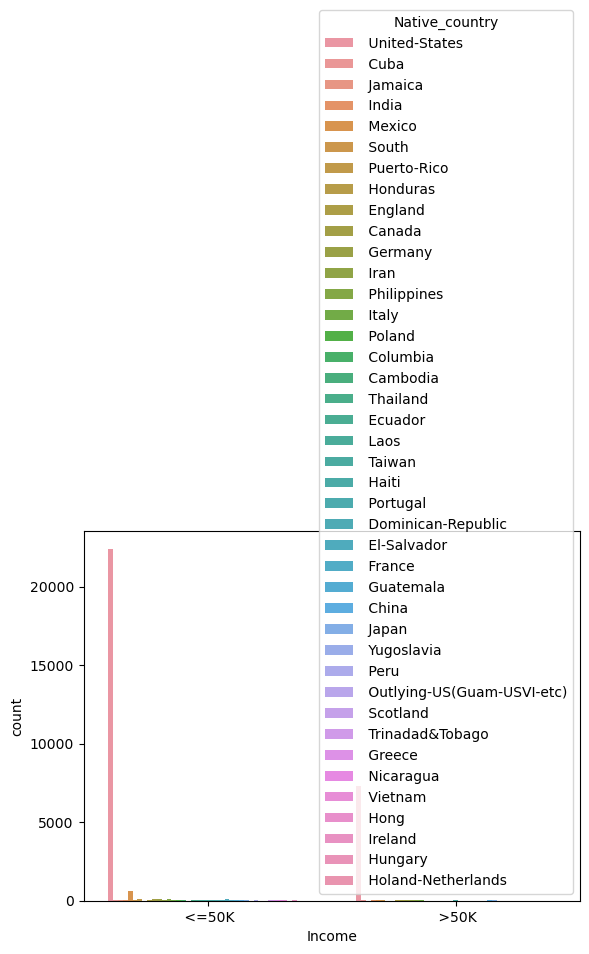

In [175]:
sns.countplot(x='Income',hue='Native_country',data=df)

Most people earning >50K have native country as US.

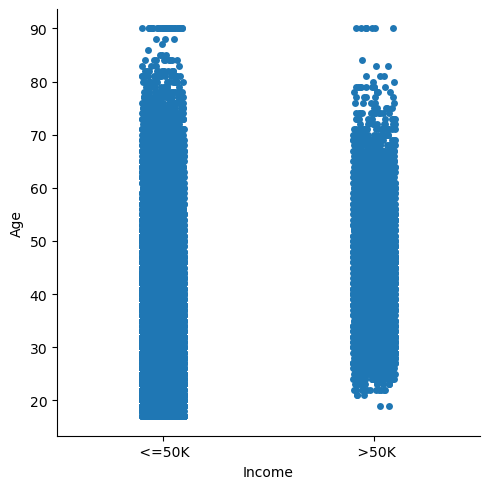

In [177]:
sns.catplot(x='Income',y='Age', data=df)

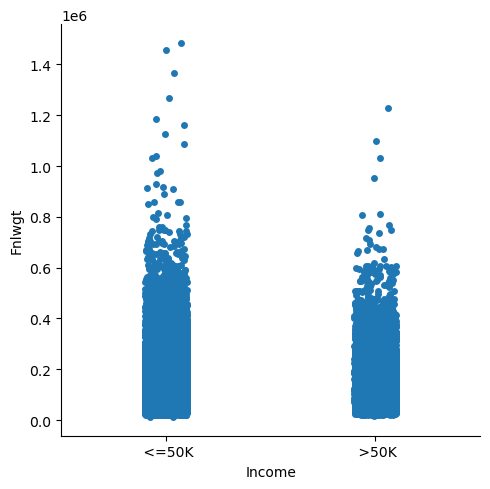

In [178]:
sns.catplot(x='Income',y='Fnlwgt', data=df)

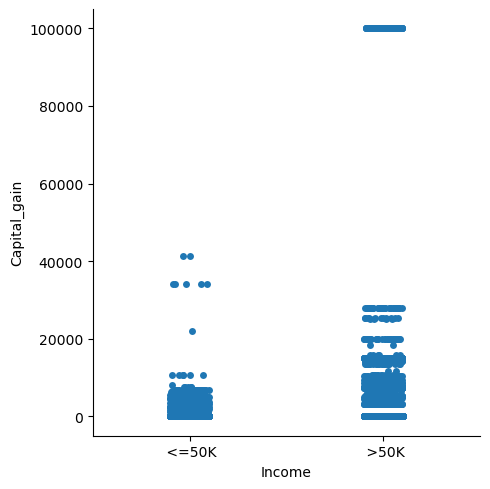

In [179]:
sns.catplot(x='Income',y='Capital_gain', data=df)

Most people have 0  and less than 20000 capital gain. 

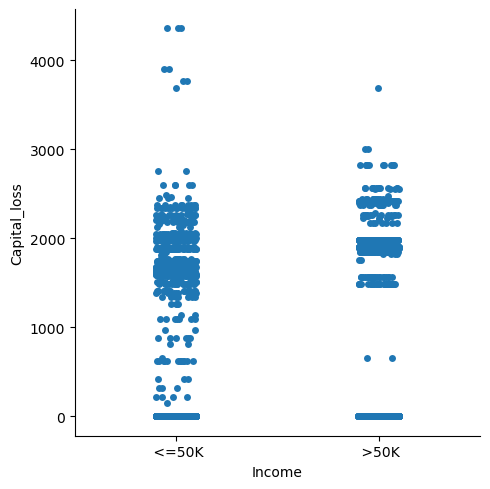

In [180]:
sns.catplot(x='Income',y='Capital_loss', data=df)

Most of the People who are having capital loss are earning <50K.

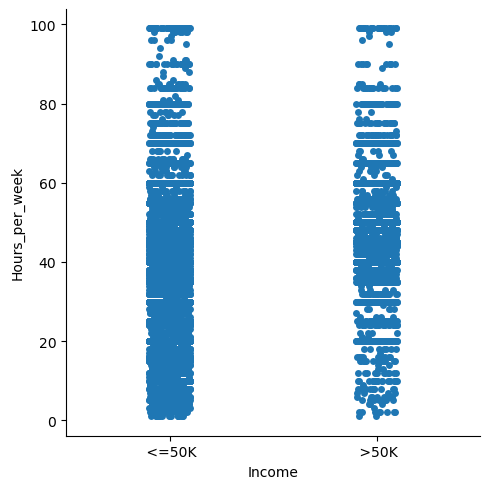

In [181]:
sns.catplot(x='Income',y='Hours_per_week', data=df)

Multivariate Analysis

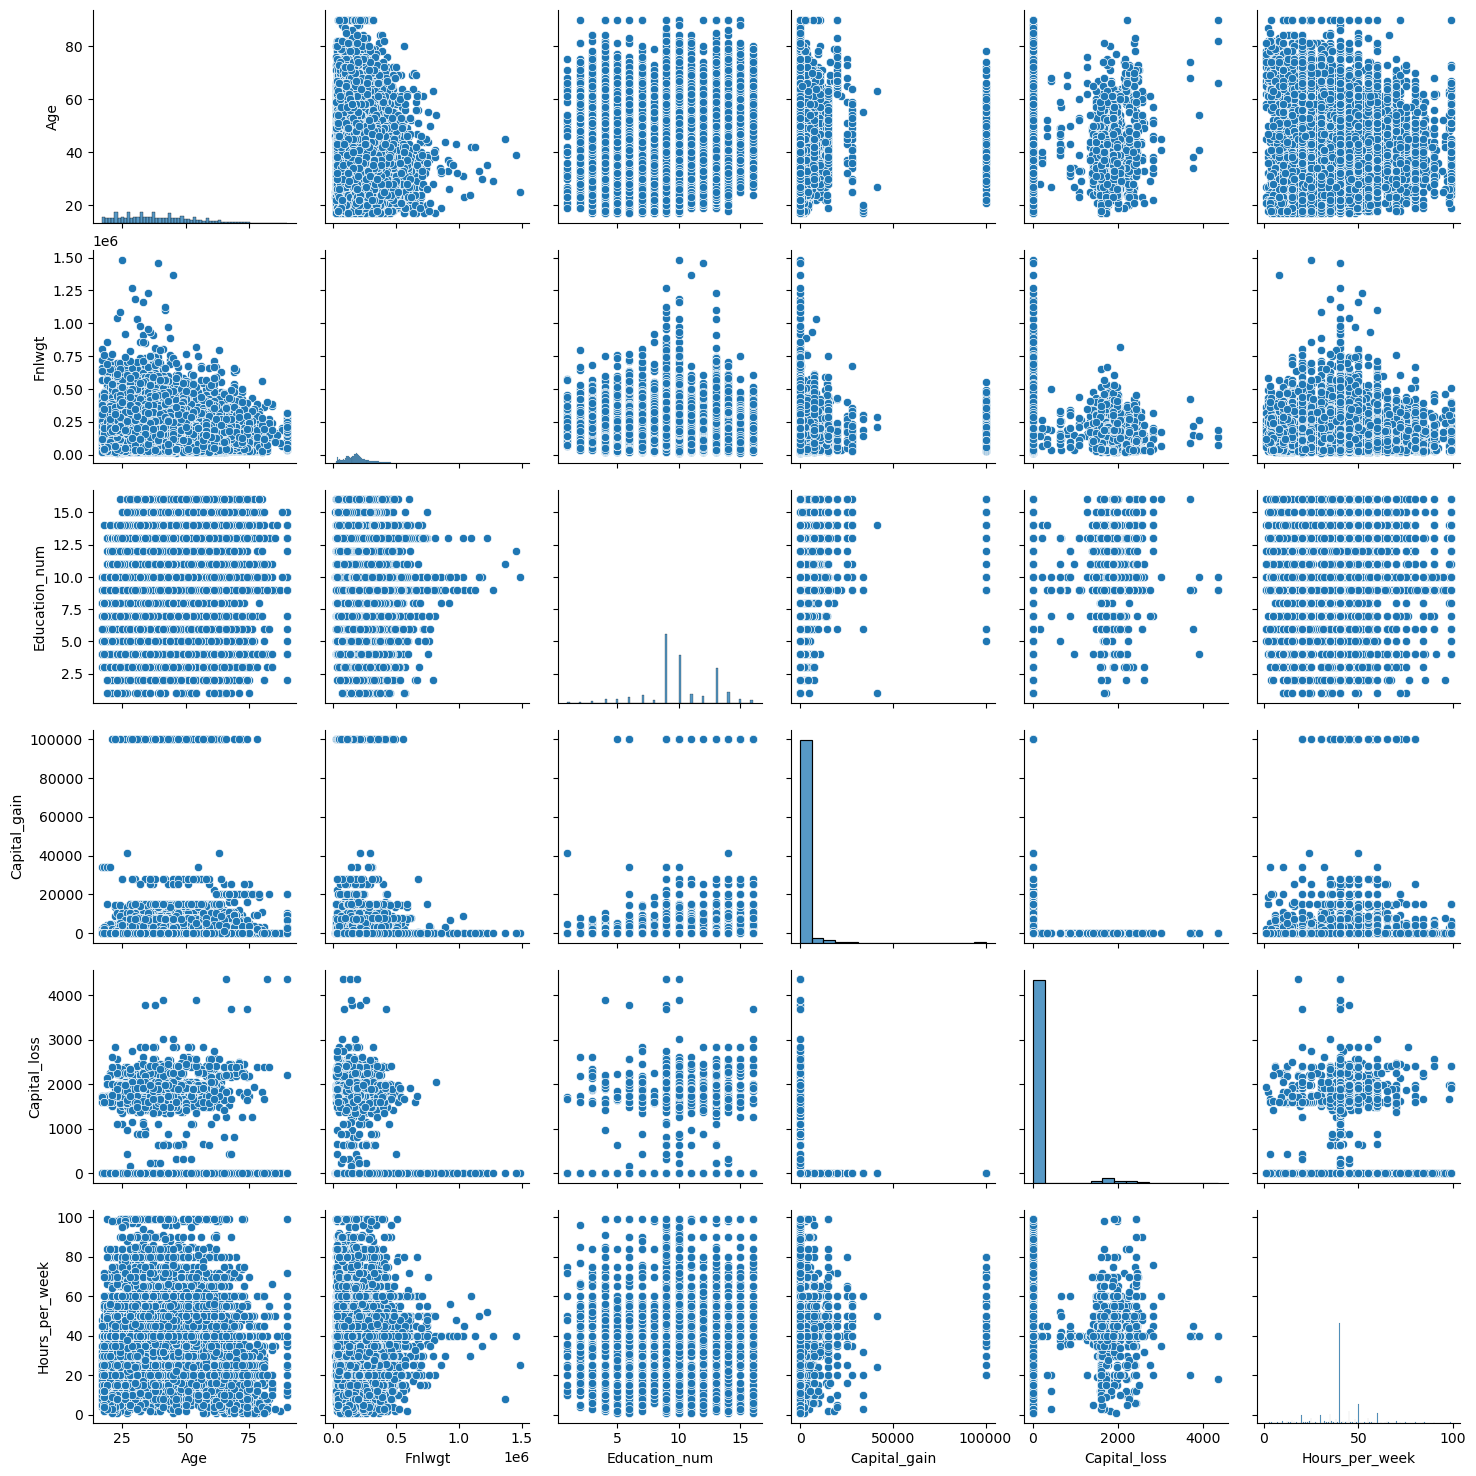

In [182]:
sns.pairplot(df)
plt.show()

# Checking for Outliers.

In [183]:
num_columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

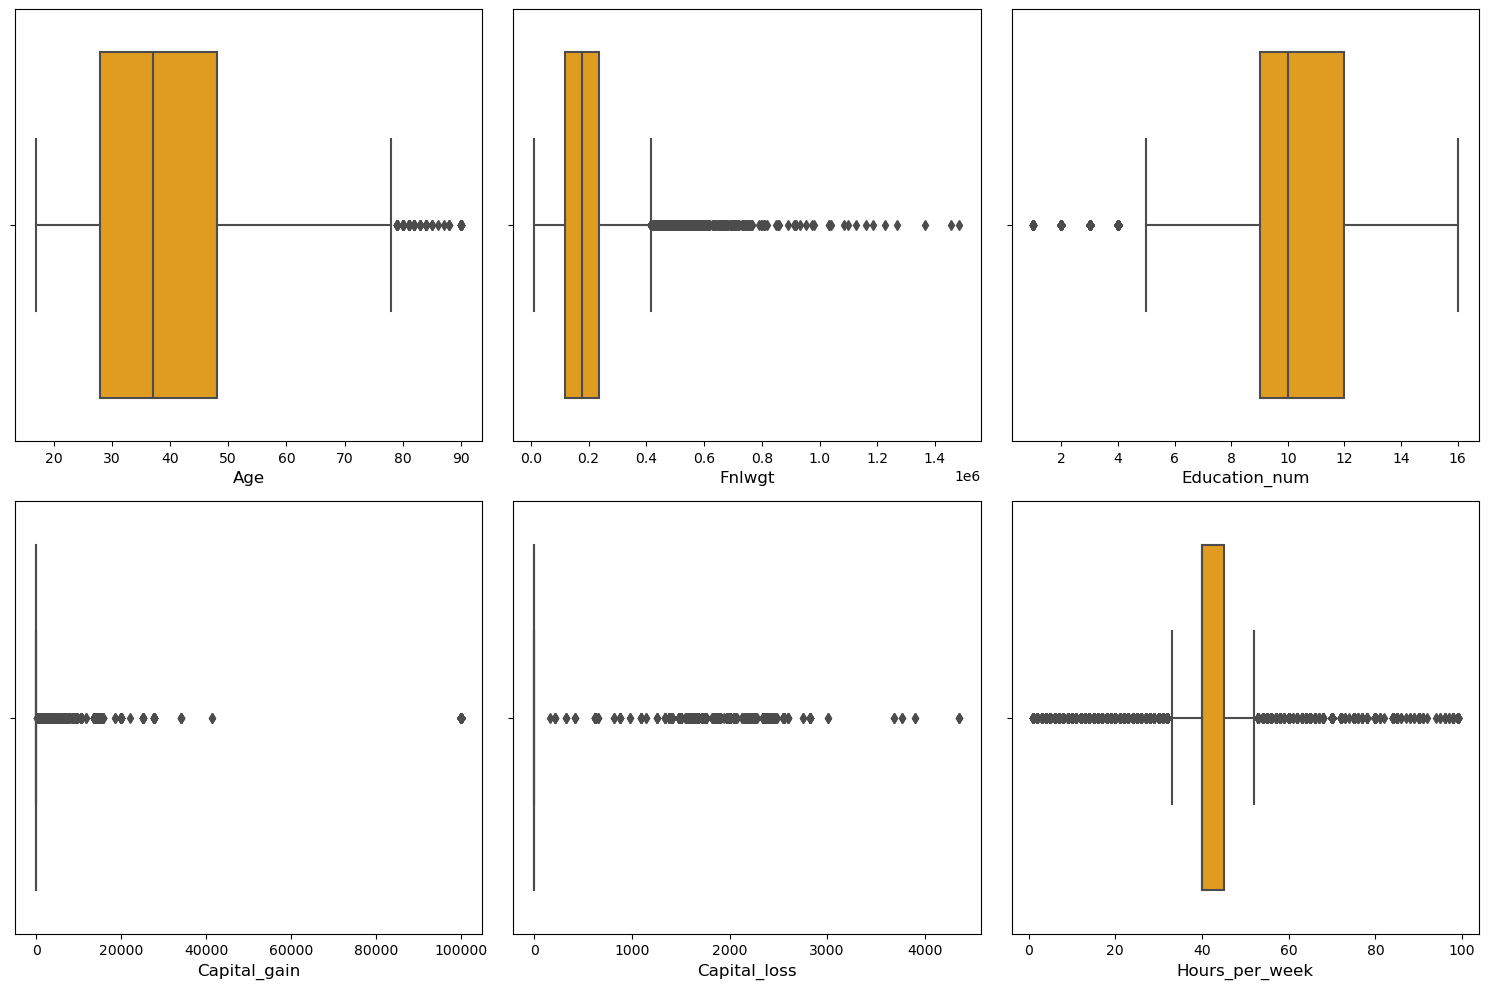

In [184]:
# Checking the outliers present in numerical columns using boxplot
plt.figure(figsize=(15,10))
p=1
for col in num_columns:
    if p<=6:
        ax=plt.subplot(2,3,p)
        sns.boxplot(x=col, data=df,color='orange')
        plt.xlabel(col,fontsize=12)
    p+=1
plt.tight_layout()

As, we can see that outliers are present

In [185]:
from scipy.stats import zscore
z = np.abs(zscore(df[num_columns]))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,1.134817,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.420646,0.145969,0.216747,0.035664
2,1.056935,0.425720,1.198377,0.145969,0.216747,0.035664
3,0.776180,1.408036,1.134817,0.145969,0.216747,0.035664
4,0.116259,0.898091,1.523683,0.145969,0.216747,0.035664
...,...,...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.420646,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.420646,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.420646,0.145969,0.216747,1.655506


In [186]:
#Threshold 3
df_new = df[(z < 3).all(axis=1)]
df_new.shape

(29808, 15)

In [187]:
print("Data loss percentage = ",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data loss percentage =  8.384558642734202


In [188]:
df=df_new

In [189]:
df.shape

(29808, 15)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29808 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             29808 non-null  int64 
 1   Workclass       29808 non-null  object
 2   Fnlwgt          29808 non-null  int64 
 3   Education       29808 non-null  object
 4   Education_num   29808 non-null  int64 
 5   Marital_status  29808 non-null  object
 6   Occupation      29808 non-null  object
 7   Relationship    29808 non-null  object
 8   Race            29808 non-null  object
 9   Sex             29808 non-null  object
 10  Capital_gain    29808 non-null  int64 
 11  Capital_loss    29808 non-null  int64 
 12  Hours_per_week  29808 non-null  int64 
 13  Native_country  29808 non-null  object
 14  Income          29808 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.6+ MB


# Encoding categorical column

Converting Categorical column to numerical

In [191]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [192]:
df.sample(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
513,28,3.0,189346,10.0,9,0.0,2.0,1.0,4.0,1.0,0,0,45,37.0,0.0
11688,26,3.0,302097,10.0,9,2.0,6.0,0.0,4.0,1.0,3464,0,48,37.0,0.0
18311,37,3.0,50837,4.0,4,0.0,3.0,1.0,4.0,1.0,0,0,50,37.0,0.0
31106,27,3.0,159623,13.0,10,2.0,11.0,0.0,4.0,1.0,0,0,40,37.0,0.0
9463,55,5.0,205296,13.0,10,2.0,11.0,5.0,4.0,0.0,0,0,50,37.0,0.0
12711,27,3.0,214702,12.0,15,2.0,9.0,0.0,4.0,1.0,0,0,42,37.0,1.0
2198,44,3.0,373050,10.0,9,2.0,13.0,0.0,4.0,1.0,0,0,40,37.0,0.0
13777,38,3.0,34173,8.0,13,4.0,11.0,4.0,4.0,0.0,0,0,45,37.0,0.0
13558,25,3.0,193701,8.0,13,4.0,7.0,1.0,4.0,0.0,0,0,38,37.0,0.0
16350,29,3.0,131310,6.0,12,4.0,11.0,3.0,4.0,0.0,0,0,40,37.0,0.0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29808 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             29808 non-null  int64  
 1   Workclass       29808 non-null  float64
 2   Fnlwgt          29808 non-null  int64  
 3   Education       29808 non-null  float64
 4   Education_num   29808 non-null  int64  
 5   Marital_status  29808 non-null  float64
 6   Occupation      29808 non-null  float64
 7   Relationship    29808 non-null  float64
 8   Race            29808 non-null  float64
 9   Sex             29808 non-null  float64
 10  Capital_gain    29808 non-null  int64  
 11  Capital_loss    29808 non-null  int64  
 12  Hours_per_week  29808 non-null  int64  
 13  Native_country  29808 non-null  float64
 14  Income          29808 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 3.6 MB


We can see that all columns are in numerical/continous nature.

# Checking Correlation

In [194]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.032951,-0.074430,-0.004661,0.041431,-0.285335,-0.002594,-0.266802,0.027937,0.086589,0.131014,0.020820,0.091817,-0.001640,0.239314
Workclass,0.032951,1.000000,-0.022991,0.002653,-0.000674,-0.016093,0.008216,-0.057609,0.045442,0.068831,0.011974,-0.010143,0.027270,-0.001685,-0.007180
Fnlwgt,-0.074430,-0.022991,1.000000,-0.023083,-0.037725,0.029000,-0.002200,0.008349,-0.010514,0.028520,-0.002374,0.002579,-0.015489,-0.060659,-0.009160
Education,-0.004661,0.002653,-0.023083,1.000000,0.361097,-0.037416,-0.042764,-0.012924,0.015588,-0.027878,0.027164,-0.000924,0.060787,0.071462,0.074621
Education_num,0.041431,-0.000674,-0.037725,0.361097,1.000000,-0.059092,0.069639,-0.096694,0.028587,0.009276,0.154841,0.009481,0.150713,0.058248,0.318731
Marital_status,-0.285335,-0.016093,0.029000,-0.037416,-0.059092,1.000000,0.035351,0.184713,-0.066169,-0.123350,-0.068272,-0.013817,-0.195162,-0.016736,-0.194355
Occupation,-0.002594,0.008216,-0.002200,-0.042764,0.069639,0.035351,1.000000,-0.036558,-0.003263,0.049930,0.009530,-0.001857,-0.022743,-0.001708,0.030533
Relationship,-0.266802,-0.057609,0.008349,-0.012924,-0.096694,0.184713,-0.036558,1.000000,-0.116226,-0.577197,-0.090370,0.028830,-0.257798,-0.011165,-0.245913
Race,0.027937,0.045442,-0.010514,0.015588,0.028587,-0.066169,-0.003263,-0.116226,1.000000,0.089914,0.023537,0.001324,0.045400,0.117269,0.071755
Sex,0.086589,0.068831,0.028520,-0.027878,0.009276,-0.123350,0.049930,-0.577197,0.089914,1.000000,0.070813,-0.026354,0.233755,0.002282,0.209946


<Axes: >

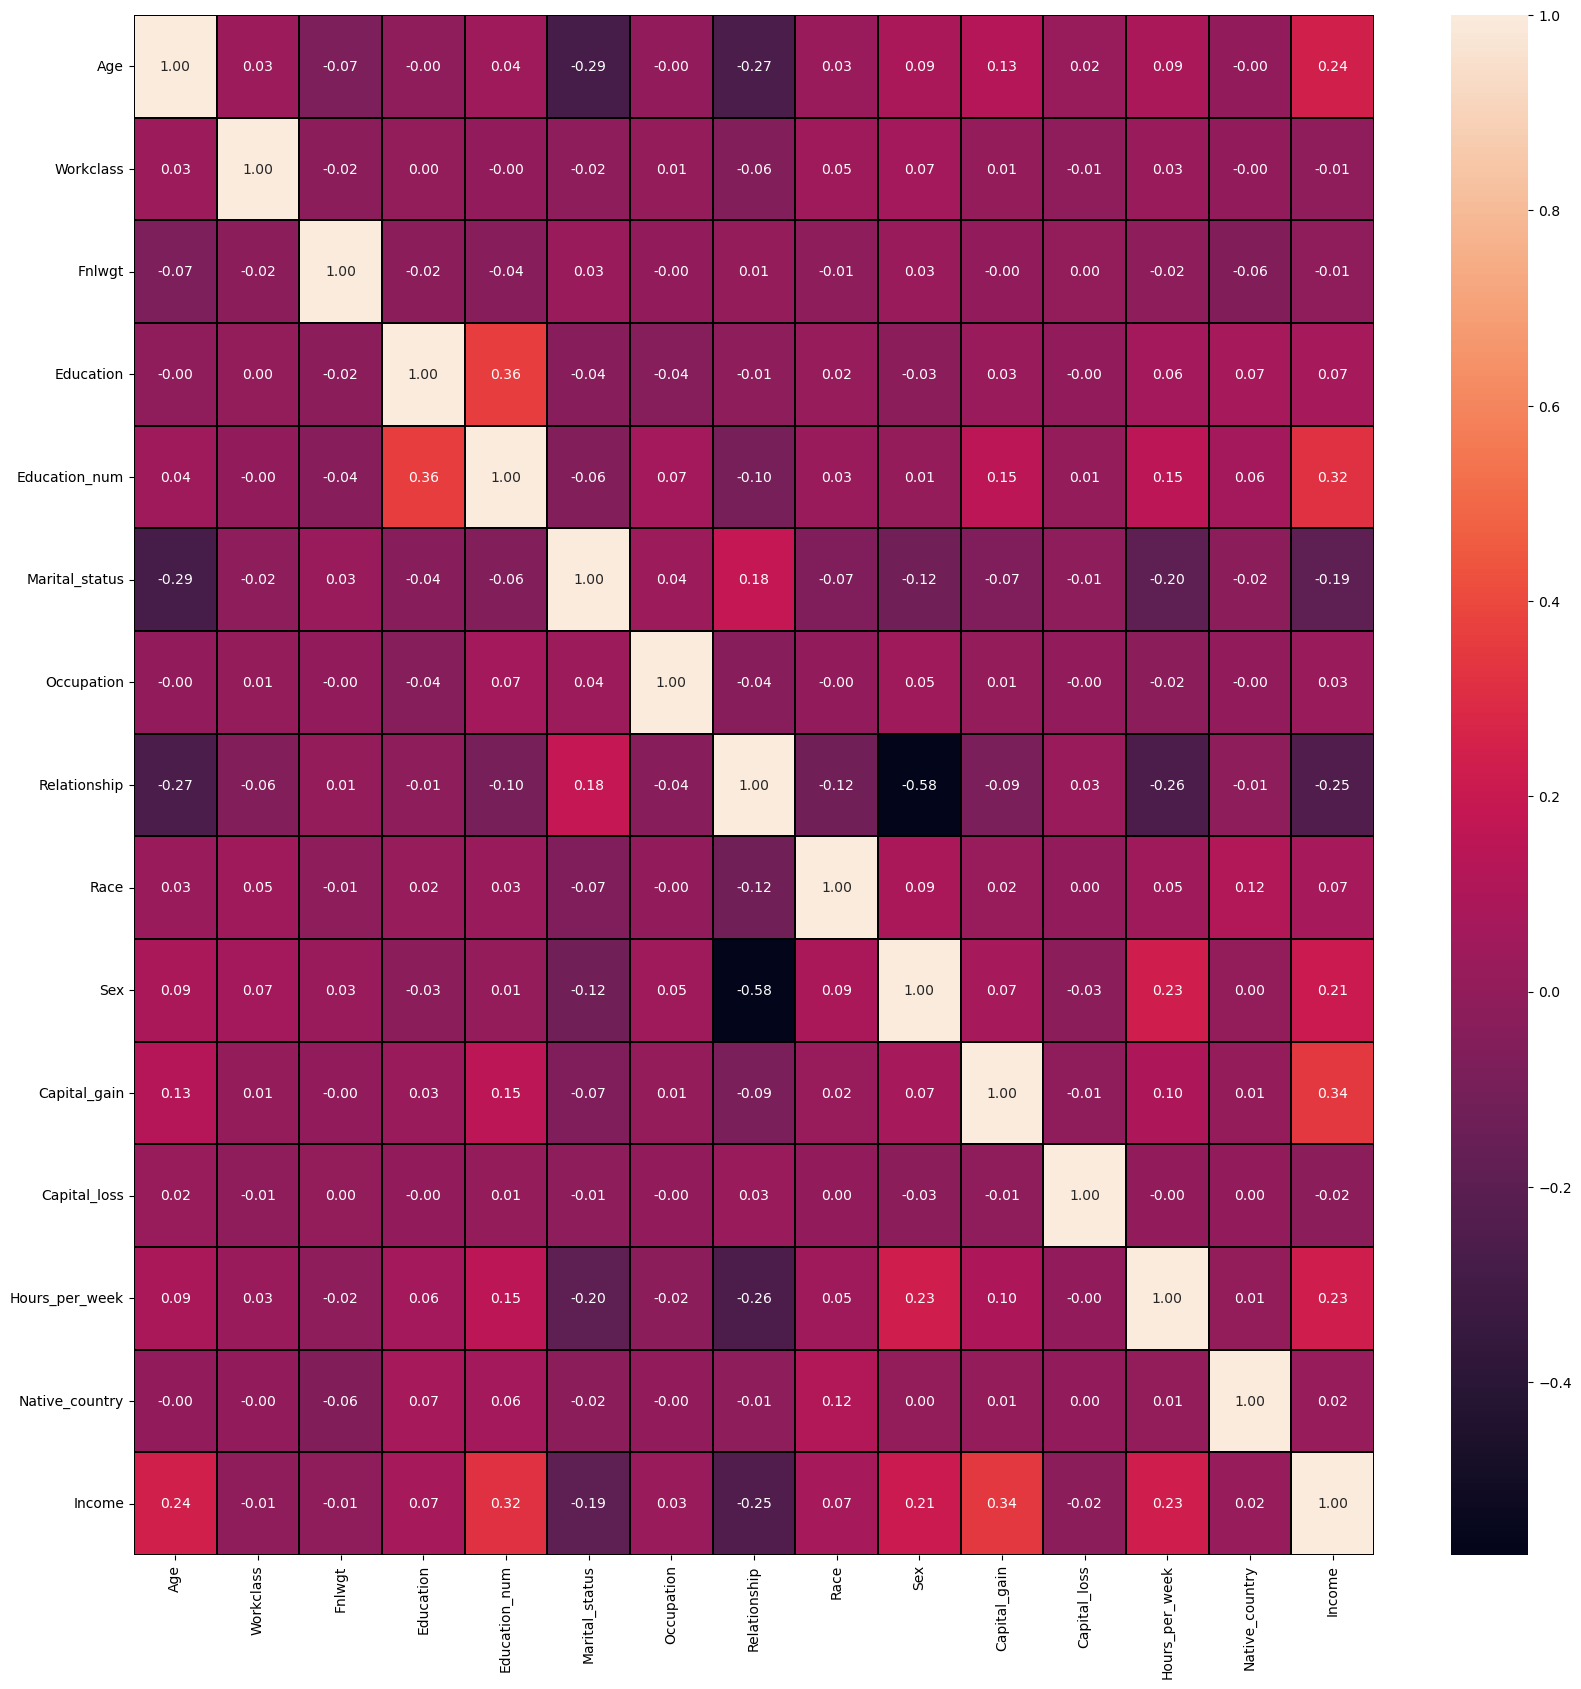

In [195]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')

In [196]:
#correlation with target column(Income)
corr = df.corr()['Income'].abs().sort_values(ascending=False)
print(corr)

Income            1.000000
Capital_gain      0.342581
Education_num     0.318731
Relationship      0.245913
Age               0.239314
Hours_per_week    0.230589
Sex               0.209946
Marital_status    0.194355
Education         0.074621
Race              0.071755
Occupation        0.030533
Native_country    0.016792
Capital_loss      0.016606
Fnlwgt            0.009160
Workclass         0.007180
Name: Income, dtype: float64


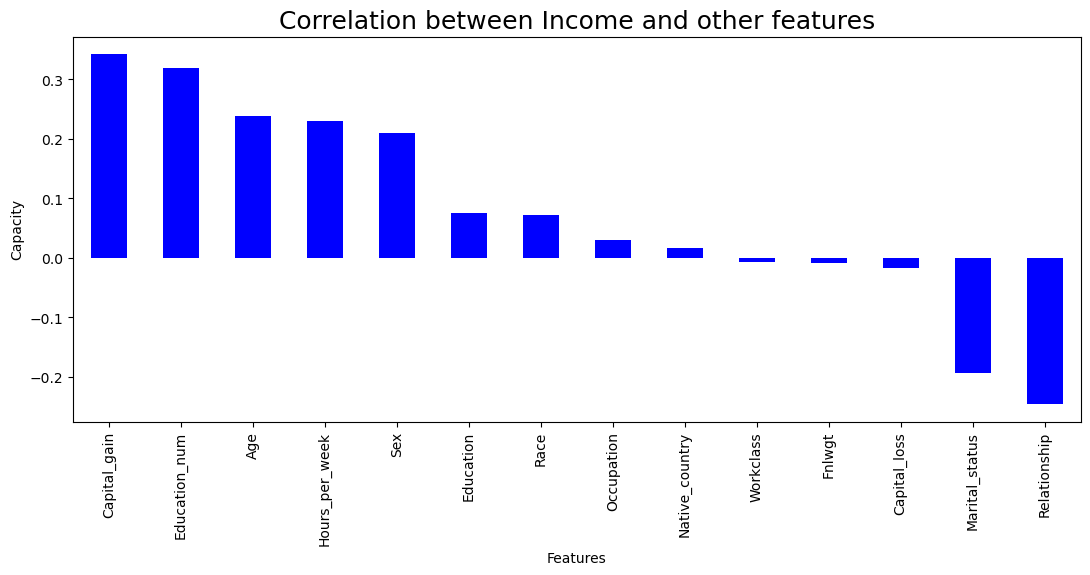

In [197]:
plt.figure(figsize=(13,5))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='blue')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between Income and other features',fontsize=18)
plt.show()

In [234]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

The target variable 'Income' have positive correlation with 'Capital_gain', 'Education_num', 'Age', 'Hours_per_week' and 'Sex'. Negative correlation with 'Relationship' and 'Marital_status'.

# Checking Skewness

In [198]:
df.skew()

Age                0.491125
Workclass          0.092139
Fnlwgt             0.635160
Education         -1.073330
Education_num     -0.169811
Marital_status    -0.048428
Occupation         0.005568
Relationship       0.743548
Race              -2.435806
Sex               -0.679933
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
Native_country    -4.290422
Income             1.329852
dtype: float64

In [199]:
#Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

In [200]:
# Columns to be transformed
skew_columns = ['Capital_loss', 'Capital_gain']

scaler = PowerTransformer(method='yeo-johnson')
df[skew_columns] = scaler.fit_transform(df[skew_columns].values)

# Checking Skewness after treating skewness
df.skew()

Age                0.491125
Workclass          0.092139
Fnlwgt             0.635160
Education         -1.073330
Education_num     -0.169811
Marital_status    -0.048428
Occupation         0.005568
Relationship       0.743548
Race              -2.435806
Sex               -0.679933
Capital_gain       3.072803
Capital_loss      24.860889
Hours_per_week    -0.353124
Native_country    -4.290422
Income             1.329852
dtype: float64

Here, we can see that skewness slightly reduced.

For target variables and Categorical datas, no need to remove skewness.

# Splitting target variable

In [201]:
x = df.drop("Income", axis = 1)
y= df['Income']

In [202]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5.0,83311,8.0,13,2.0,3.0,0.0,4.0,1.0,-0.296786,-0.040161,13,37.0
1,38,3.0,215646,10.0,9,0.0,5.0,1.0,4.0,1.0,-0.296786,-0.040161,40,37.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,-0.296786,-0.040161,40,37.0
3,28,3.0,338409,8.0,13,2.0,9.0,5.0,2.0,0.0,-0.296786,-0.040161,40,4.0
4,37,3.0,284582,11.0,14,2.0,3.0,5.0,4.0,0.0,-0.296786,-0.040161,40,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,6.0,12,2.0,12.0,5.0,4.0,0.0,-0.296786,-0.040161,38,37.0
32556,40,3.0,154374,10.0,9,2.0,6.0,0.0,4.0,1.0,-0.296786,-0.040161,40,37.0
32557,58,3.0,151910,10.0,9,6.0,0.0,4.0,4.0,0.0,-0.296786,-0.040161,40,37.0
32558,22,3.0,201490,10.0,9,4.0,0.0,3.0,4.0,1.0,-0.296786,-0.040161,20,37.0


In [203]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 29808, dtype: float64

# To remove biasness, we use Standard scaler method

In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887304,1.732583,-1.077578,-0.340122,1.191227,-0.410260,-0.780453,-0.919032,0.393999,0.716254,-0.296786,-0.040161,-2.415235,0.257250
1,-0.011046,-0.078182,0.321940,0.249488,-0.439623,-1.730676,-0.278831,-0.297940,0.393999,0.716254,-0.296786,-0.040161,0.009070,0.257250
2,1.111891,-0.078182,0.523669,-2.403756,-1.255048,-0.410260,-0.278831,-0.919032,-1.956981,0.716254,-0.296786,-0.040161,0.009070,0.257250
3,-0.759670,-0.078182,1.620229,-0.340122,1.191227,-0.410260,0.724414,2.186429,-1.956981,-1.396153,-0.296786,-0.040161,0.009070,-5.413799
4,-0.085908,-0.078182,1.050977,0.544293,1.598939,-0.410260,-0.780453,2.186429,0.393999,-1.396153,-0.296786,-0.040161,0.009070,0.257250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29803,-0.834532,-0.078182,0.762476,-0.929731,0.783514,-0.410260,1.476848,2.186429,0.393999,-1.396153,-0.296786,-0.040161,-0.170508,0.257250
29804,0.138679,-0.078182,-0.326046,0.249488,-0.439623,-0.410260,-0.028019,-0.919032,0.393999,0.716254,-0.296786,-0.040161,0.009070,0.257250
29805,1.486203,-0.078182,-0.352105,0.249488,-0.439623,2.230572,-1.532886,1.565337,0.393999,-1.396153,-0.296786,-0.040161,0.009070,0.257250
29806,-1.208844,-0.078182,0.172232,0.249488,-0.439623,0.910156,-1.532886,0.944244,0.393999,0.716254,-0.296786,-0.040161,-1.786711,0.257250


# Checking multicollinearity

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,1.176776,Age
1,1.008005,Workclass
2,1.012468,Fnlwgt
3,1.162293,Education
4,1.205610,Education_num
5,1.137430,Marital_status
6,1.016331,Occupation
7,1.673161,Relationship
8,1.032564,Race
9,1.549942,Sex


Here, we can see that no multicollinearity presents between features.

# Balancing dataset

In [206]:
y.value_counts()

0.0    23156
1.0     6652
Name: Income, dtype: int64

Here, we can see that data is not balanced. Since it is a classification problem, we will balance the data using oversampling method

In [207]:
import sklearn
from imblearn.over_sampling import SMOTE
SME = SMOTE()
x1,y1 = SME.fit_resample(x,y)

In [208]:
y1.value_counts()

0.0    23156
1.0    23156
Name: Income, dtype: int64

Now, the dataset is balanced, we can go for model building.

# Model Building

Finding the best random state.

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best accuracy is ", maxAcc, "at random state ", maxRS)

The best accuracy is  0.770188570606017 at random state  158


# Train Test Split

In [210]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# Classification Algorithms

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [212]:
#Creating a list for models
LR = LogisticRegression()
KNN = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ETC = ExtraTreesClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()
GNB = GaussianNB()
SV = SVC()

models = [LR, KNN, DTC, RFC, ETC, GBC, ABC, BC, GNB, SV]

# Accuracy and CV score for all Classification Models:

In [213]:
for i in models:
    print(i)
    print("------------------------")
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print("Accuracy for ",i,"model is ", accuracy_score(y_test,pred)*100)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("Cross Validation:")
    print("-----------------")
    cv_score = cross_val_score(i,x1,y1)
    print("CV Scores are : ",cv_score)
    print("CV Score mean : ",cv_score.mean())
    print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,pred) - cv_score.mean())
    print('\n\n')

LogisticRegression()
------------------------
Accuracy for  LogisticRegression() model is  77.0188570606017
[[5226 1678]
 [1515 5475]]
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      6904
         1.0       0.77      0.78      0.77      6990

    accuracy                           0.77     13894
   macro avg       0.77      0.77      0.77     13894
weighted avg       0.77      0.77      0.77     13894

Cross Validation:
-----------------
CV Scores are :  [0.754939   0.76249595 0.75933924 0.76851652 0.76678903]
CV Score mean :  0.7624159482842523
Difference between Accuracy score and CV score is  0.007772622321764677



KNeighborsClassifier()
------------------------
Accuracy for  KNeighborsClassifier() model is  85.17345616813013
[[5281 1623]
 [ 437 6553]]
              precision    recall  f1-score   support

         0.0       0.92      0.76      0.84      6904
         1.0       0.80      0.94      0.86      6990

    accuracy 

Extra Trees Classifier is our best model because Accuracy score and CV Score is high and difference between Accuracy score and CV score is least

# Extra Trees Classifier is our best model

# Hyper Parameter Tuning

In [217]:
#Using Grid Search CV on Extra Trees Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'n_estimators' : [50, 100, 200],
              'max_depth' : [0, 10, 20]}

In [218]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5 )

In [219]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [220]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}


# Finding best random state for our best model.

In [221]:
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    ETC = ExtraTreesClassifier()
    ETC.fit(x_train,y_train)
    pred = ETC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best accuracy is ", maxAcc, "at random state ", maxRS)

The best accuracy is  0.9109687634950339 at random state  40


# Building Final model using best parameters

In [244]:
Final_model= ExtraTreesClassifier(criterion = 'gini', max_depth = 20, n_estimators = 100)
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=40)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
Accuracy = accuracy_score(y_test,pred)
print("Accuracy is ", Accuracy*100 )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy is  91.14725780912623
[[6087  765]
 [ 465 6577]]
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      6852
         1.0       0.90      0.93      0.91      7042

    accuracy                           0.91     13894
   macro avg       0.91      0.91      0.91     13894
weighted avg       0.91      0.91      0.91     13894



# The accuracy for our best model is 91%

# Saving the best model

In [236]:
import joblib
joblib.dump(Final_model, "Census_Income_Prediction.pkl")

['Census_Income_Prediction.pkl']

# Loading and Prediction

In [237]:
import joblib
model= joblib.load("Census_Income_Prediction.pkl")

In [238]:
prediction=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted value","original value"])

In [240]:
prediction

,0,1,2,3,4,5,6,7,8,9,...,13884,13885,13886,13887,13888,13889,13890,13891,13892,13893
Predicted value,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
original value,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


# Plotting AUC - ROC Curve

In [230]:
from sklearn import metrics

In [241]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr, tpr)

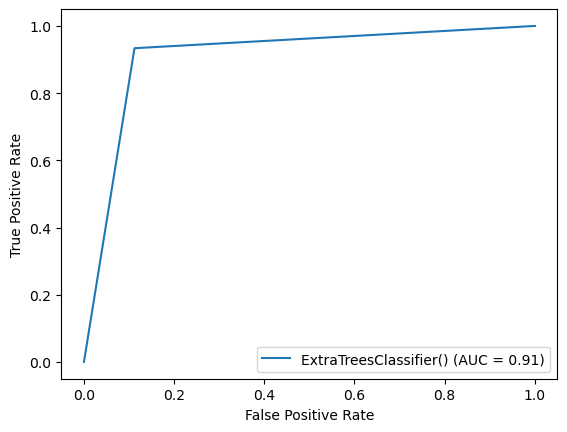

In [242]:
curve = metrics.RocCurveDisplay(fpr=fpr, tpr= tpr, roc_auc= roc_auc, estimator_name=Final_model)
curve.plot()